In [ ]:
#### Collected data from FRED website
# found a facter that Influence US home price
#Interest Rates: Mortgage rates, often tracked through the 30-year fixed mortgage rate.
#Unemployment Rate: National unemployment rate.
#Inflation: Consumer Price Index (CPI).
#Income Levels: Median household income.
#Housing Supply: Number of housing starts.
#Population Growth: Annual population growth rate.
#Economic Growth: GDP growth rate.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## data loading and pre procceing & cleaning the data and merging the data on same date
import pandas as pd

# Load the downloaded data
cs_index = pd.read_csv('CSUSHPISA.csv', parse_dates=['DATE'], index_col='DATE')
Interest_rates = pd.read_csv('Interest rate Us.csv', parse_dates=['DATE'], index_col='DATE')
unemployment_rate = pd.read_csv('UNRATE.csv', parse_dates=['DATE'], index_col='DATE')
cpi = pd.read_csv('CPIAUCSL.csv', parse_dates=['DATE'], index_col='DATE')
housing_starts = pd.read_csv('HOUST.csv', parse_dates=['DATE'], index_col='DATE')
gdp_growth_rate = pd.read_csv('GDP.csv', parse_dates=['DATE'], index_col='DATE')
# Assuming median household income and population growth are downloaded similarly

# Merge the datasets
data = cs_index.join([mortgage_rates, unemployment_rate, cpi, housing_starts, gdp_growth_rate], how='outer')
data.columns = ['CS_Index', 'Interest_Rate', 'unemployment_Rate', 'cpi', 'housing_Starts', 'gdp_growth_rate']

# Fill missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Display the first few rows of the dataframe
print(data.head())


            CS_Index  Interest_Rate  unemployment_Rate    cpi  housing_Starts  \
DATE                                                                            
1947-01-01       NaN            NaN                NaN  21.48             NaN   
1947-02-01       NaN            NaN                NaN  21.62             NaN   
1947-03-01       NaN            NaN                NaN  22.00             NaN   
1947-04-01       NaN            NaN                NaN  22.00             NaN   
1947-05-01       NaN            NaN                NaN  21.95             NaN   

            gdp_growth_rate  
DATE                         
1947-01-01          243.164  
1947-02-01          243.164  
1947-03-01          243.164  
1947-04-01          245.968  
1947-05-01          245.968  


In [ ]:
data.head()

,CS_Index,Mortgage_Rate,Unemployment_Rate,CPI,Housing_Starts,GDP_Growth_Rate
DATE,,,,,,
1947-01-01,NaN,NaN,NaN,21.48,NaN,243.164
1947-02-01,NaN,NaN,NaN,21.62,NaN,243.164
1947-03-01,NaN,NaN,NaN,22.00,NaN,243.164
1947-04-01,NaN,NaN,NaN,22.00,NaN,245.968
1947-05-01,NaN,NaN,NaN,21.95,NaN,245.968


In [ ]:
# prompt: Using dataframe data: bubble

# This is an ambiguous request. Please provide more information.
# What columns would you like to use for the bubble plot?
# How would you like to encode the size of the bubbles?


Build Model
We will use a Linear Regression model to analyze the data.

In [ ]:
# Merge the datasets
data = cs_index.join([Interest_rates, unemployment_rate, cpi, housing_starts, gdp_growth_rate], how='outer') # Use Interest_rates instead of mortgage_rates
data.columns = ['CS_Index', 'Interest_Rate', 'Unemployment_Rate', 'cpi', 'Housing_Starts', 'gdp_growth_rate'] # Capitalize column names to match variable names

# Fill missing values using forward fill and backward fill
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# Define the target variable and feature variables
X = data[['Interest_Rate',  'Unemployment_Rate', 'cpi', 'Housing_Starts', 'gdp_growth_rate']] # Use capitalized column names
y = data['CS_Index']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split #Import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
from sklearn.linear_model import LinearRegression #Import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display the model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Absolute Error: 8.64512017460365
Mean Squared Error: 120.36114225309146
R-squared: 0.9713438187717651
                   Coefficient
Interest_Rate         1.668693
Unemployment_Rate     0.188372
cpi                  -0.769604
Housing_Starts        0.014271
gdp_growth_rate       0.017004


Interpret Results
The model coefficients will help us understand the impact of each factor on home prices. Positive coefficients indicate a positive relationship with home prices, while negative coefficients indicate a negative relationship.

This approach will provide insights into how various factors have influenced US home prices over the last 20 years

<function matplotlib.pyplot.show(close=None, block=None)>

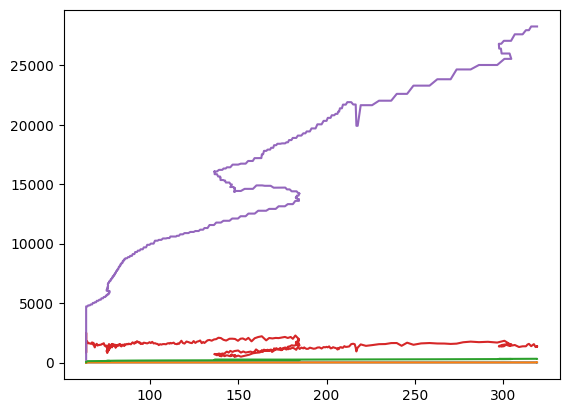

In [ ]:
Y = data[['Interest_Rate',  'Unemployment_Rate', 'cpi', 'Housing_Starts', 'gdp_growth_rate']] # Use capitalized column names
X = data['CS_Index']
plt.plot(X,Y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

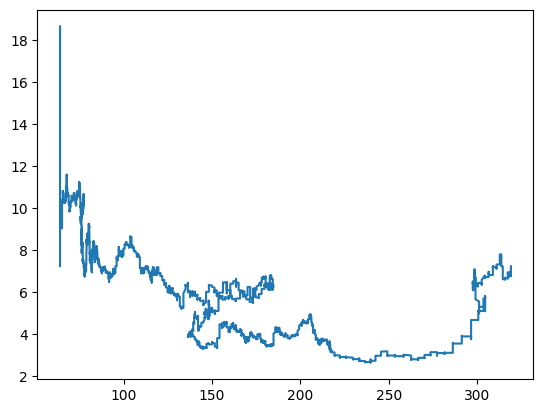

In [ ]:
Y = data[['Interest_Rate']]
X = data['CS_Index']
plt.plot(X,Y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

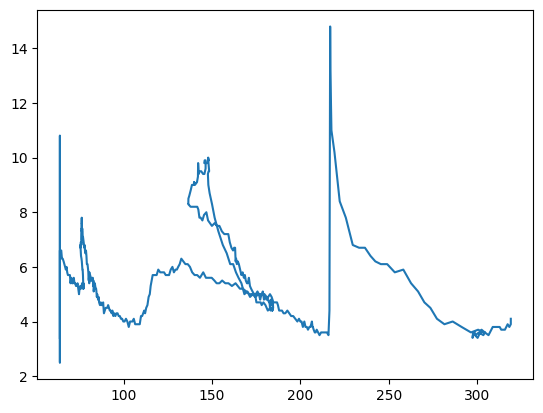

In [ ]:
Y = data[['Unemployment_Rate']] # Use capitalized column names
X = data['CS_Index']
plt.plot(X,Y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

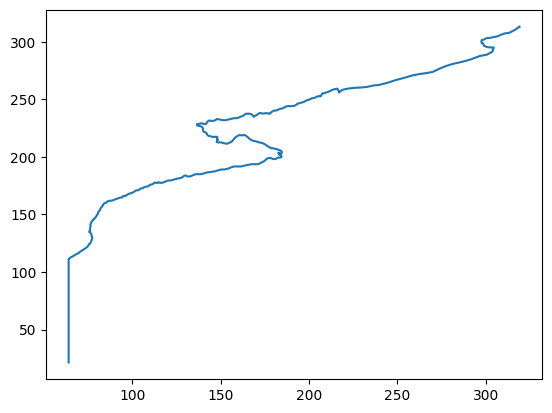

In [ ]:
Y = data[[ 'cpi']] # Use capitalized column names
X = data['CS_Index']
plt.plot(X,Y)
plt.show